In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("covid19_italy_region.csv")

In [3]:
data.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN


In [4]:
data.columns

Index(['SNo', 'Date', 'Country', 'RegionCode', 'RegionName', 'Latitude',
       'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed'],
      dtype='object')

In [5]:
data.describe()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.00000,4.872000e+03
mean,3013.000000,11.857143,43.046293,12.225955,509.093579,55.892318,564.985897,5722.911399,6287.897296,286.885847,9337.852829,1474.370665,17100.12361,2.600810e+05
std,1739.989368,6.274319,2.488987,2.659168,1272.731157,134.957979,1403.362341,15892.768789,16804.884786,818.450458,20551.265039,3365.190225,36934.67627,3.339818e+05
min,0.000000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-229.000000,0.000000,0.000000,0.00000,3.482000e+03
25%,1506.500000,7.000000,41.125596,11.121231,16.000000,1.000000,17.000000,139.000000,168.000000,4.000000,734.000000,98.000000,1383.50000,6.507375e+04
50%,3013.000000,12.000000,43.616760,12.388247,93.000000,9.000000,106.000000,743.000000,905.000000,31.000000,2840.000000,389.000000,4613.00000,1.365560e+05
75%,4519.500000,17.000000,45.434905,13.768136,384.500000,46.000000,434.000000,3057.000000,3735.000000,159.500000,8450.500000,1102.500000,15304.00000,3.043542e+05
max,6026.000000,22.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,155066.000000,164406.000000,11489.000000,289706.000000,23024.000000,429109.00000,2.415099e+06


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027 entries, 0 to 6026
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SNo                        6027 non-null   int64  
 1   Date                       6027 non-null   object 
 2   Country                    6027 non-null   object 
 3   RegionCode                 6027 non-null   int64  
 4   RegionName                 6027 non-null   object 
 5   Latitude                   6027 non-null   float64
 6   Longitude                  6027 non-null   float64
 7   HospitalizedPatients       6027 non-null   int64  
 8   IntensiveCarePatients      6027 non-null   int64  
 9   TotalHospitalizedPatients  6027 non-null   int64  
 10  HomeConfinement            6027 non-null   int64  
 11  CurrentPositiveCases       6027 non-null   int64  
 12  NewPositiveCases           6027 non-null   int64  
 13  Recovered                  6027 non-null   int64

In [7]:
data.isnull().sum()

SNo                             0
Date                            0
Country                         0
RegionCode                      0
RegionName                      0
Latitude                        0
Longitude                       0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

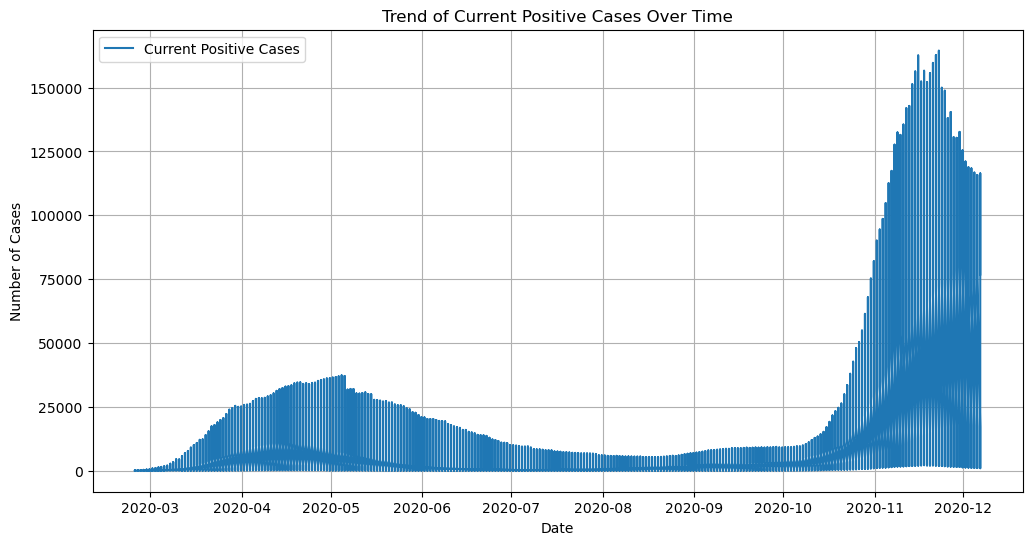

In [9]:
# Plotting the trend of 'CurrentPositiveCases' over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['CurrentPositiveCases'], label='Current Positive Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Trend of Current Positive Cases Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [11]:
import folium

# Create a base map
map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=2)

# Add heatmap
from folium.plugins import HeatMap

heat_data = [[row['Latitude'], row['Longitude'], row['TotalPositiveCases']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(map)

# Save map to HTML
map.save('heatmap.html')


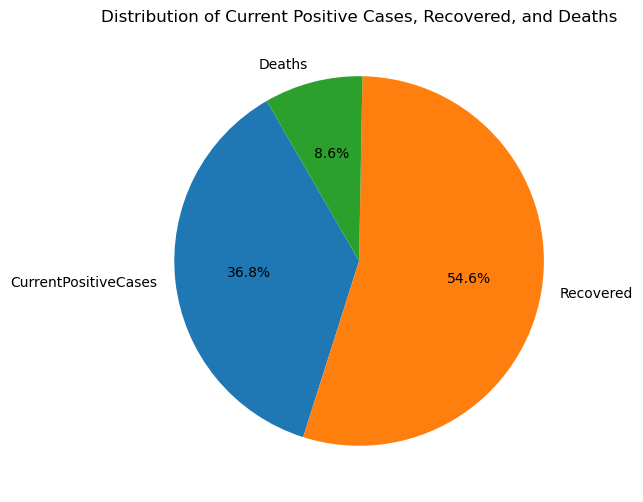

In [12]:
# Pie chart for the proportion of CurrentPositiveCases, Recovered, and Deaths
metrics = ['CurrentPositiveCases', 'Recovered', 'Deaths']
values = [data[metrics].sum()[col] for col in metrics]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=metrics, autopct='%1.1f%%', startangle=120)
plt.title('Distribution of Current Positive Cases, Recovered, and Deaths')
plt.show()


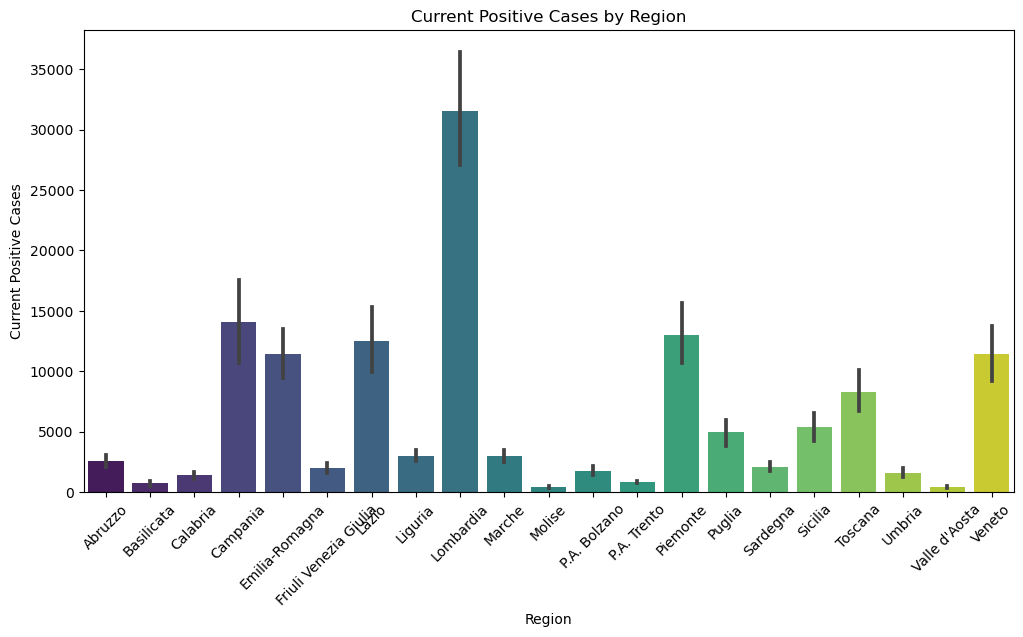

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='RegionName', y='CurrentPositiveCases', data=data, palette='viridis')
plt.title('Current Positive Cases by Region')
plt.xlabel('Region')
plt.ylabel('Current Positive Cases')
plt.xticks(rotation=45)
plt.show()

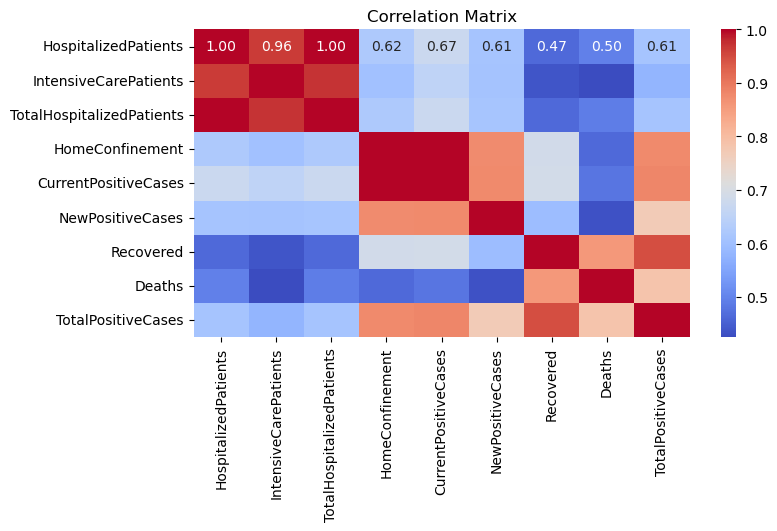

In [14]:
plt.figure(figsize=(8, 4))
correlation_matrix = data[['HospitalizedPatients', 'IntensiveCarePatients', 'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases', 'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [15]:
df_daily = data.groupby('Date').agg({
    'CurrentPositiveCases': 'sum'
}).reset_index()

# Set Date as the index
df_daily = df_daily.set_index('Date')

# Display the first few rows
print(df_daily.head())

                     CurrentPositiveCases
Date                                     
2020-02-24 18:00:00                   221
2020-02-25 18:00:00                   311
2020-02-26 18:00:00                   385
2020-02-27 18:00:00                   588
2020-02-28 18:00:00                   821


In [16]:
# Create time-based features
df_daily['DayOfYear'] = df_daily.index.dayofyear
df_daily['Month'] = df_daily.index.month
df_daily['Year'] = df_daily.index.year

# Create lag features (e.g., 1-day lag)
df_daily['Lag1'] = df_daily['CurrentPositiveCases'].shift(1)

# Drop rows with missing values due to lag feature
df_daily = df_daily.dropna()

# Display the first few rows
print(df_daily.head())


                     CurrentPositiveCases  DayOfYear  Month  Year   Lag1
Date                                                                    
2020-02-25 18:00:00                   311         56      2  2020  221.0
2020-02-26 18:00:00                   385         57      2  2020  311.0
2020-02-27 18:00:00                   588         58      2  2020  385.0
2020-02-28 18:00:00                   821         59      2  2020  588.0
2020-02-29 17:00:00                  1049         60      2  2020  821.0


In [33]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_daily.iloc[:,1:]
X.head()


,DayOfYear,Month,Year,Lag1
Date,,,,
2020-02-25 18:00:00,56,2,2020,221.0
2020-02-26 18:00:00,57,2,2020,311.0
2020-02-27 18:00:00,58,2,2020,385.0
2020-02-28 18:00:00,59,2,2020,588.0
2020-02-29 17:00:00,60,2,2020,821.0


In [34]:
from sklearn.model_selection import train_test_split

y = df_daily['CurrentPositiveCases']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 318436726.4730812


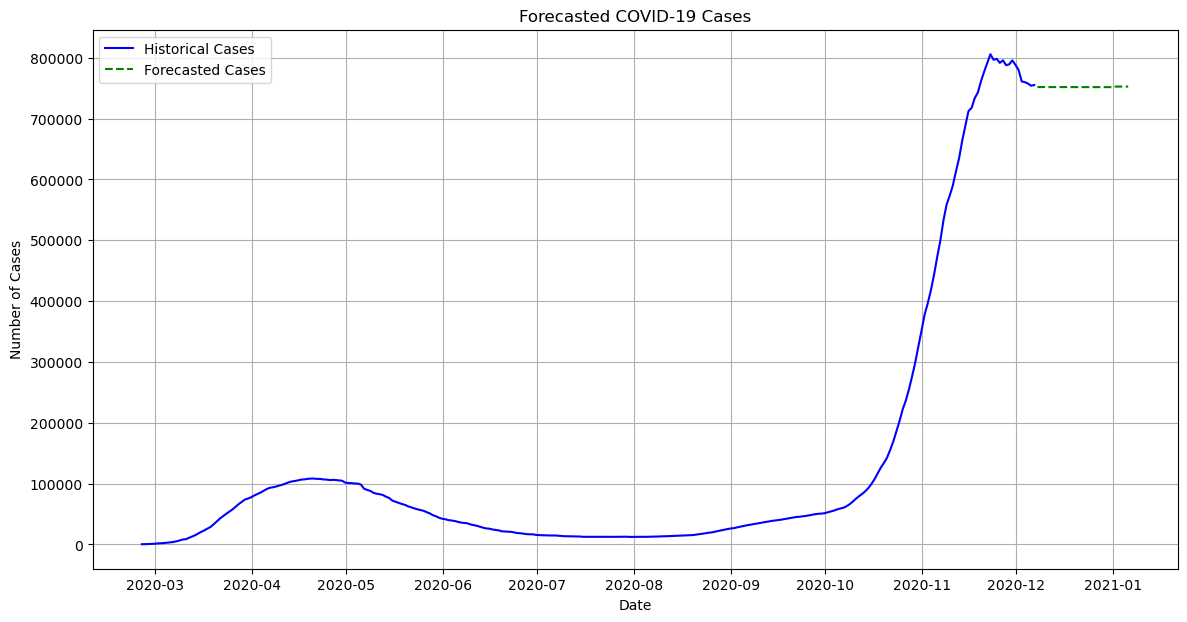

In [20]:
# Create a DataFrame for future dates (e.g., next 30 days)
future_dates = pd.date_range(start=df_daily.index[-1] + pd.Timedelta(days=1), periods=30)
future_df = pd.DataFrame(index=future_dates)
future_df['DayOfYear'] = future_df.index.dayofyear
future_df['Month'] = future_df.index.month
future_df['Year'] = future_df.index.year

# Use the last known value for the lag feature
last_known_value = df_daily['CurrentPositiveCases'].iloc[-1]
future_df['Lag1'] = last_known_value

# Predict future values
future_df['Predicted'] = model.predict(future_df[['DayOfYear', 'Month', 'Year', 'Lag1']])

# Plot future predictions
plt.figure(figsize=(14, 7))
plt.plot(df_daily.index, df_daily['CurrentPositiveCases'], label='Historical Cases', color='blue')
plt.plot(future_df.index, future_df['Predicted'], label='Forecasted Cases', color='green', linestyle='--')
plt.title('Forecasted COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# Check for NaNs in the input data
print(data['CurrentPositiveCases'].isna().sum())
print(data['CurrentPositiveCases'].describe())

0
count      6027.000000
mean       6287.897296
std       16804.884786
min           0.000000
25%         168.000000
50%         905.000000
75%        3735.000000
max      164406.000000
Name: CurrentPositiveCases, dtype: float64


In [39]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest Mean Squared Error: {mse}')

# Predicting new data (example)
new_data = pd.DataFrame({'DayOfYear': [61], 'Month': [2], 'Year': [2020], 'Lag1': [950]})
new_prediction = rf_model.predict(new_data)
print(f'Predicted Current Positive Cases: {new_prediction[0]}')


Random Forest Mean Squared Error: 218909296439.41653
Predicted Current Positive Cases: 1249.64


In [43]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize and train the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'XGBoost Mean Squared Error: {mse}')

# Predicting new data (example)
new_data = pd.DataFrame({'DayOfYear': [61], 'Month': [2], 'Year': [2020], 'Lag1': [950]})
new_prediction = xgb_model.predict(new_data)
print(f'Predicted Current Positive Cases: {new_prediction[0]}')


XGBoost Mean Squared Error: 221152237674.5132
Predicted Current Positive Cases: 1554.794189453125
